In [20]:
import requests 
import pandas as pd
import numpy as np
import sys; sys.path
import datetime
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import datetime
from tqdm import tqdm
import random
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel
from bitcoin_deep_learning.trainer import train, read_result
from bitcoin_deep_learning.cross_val import cross_val, get_cross_XY
api = ApiCall()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df = ApiCall().get_clean_data()
ApiCall().data_to_csv(df)
ApiCall().save_train_val_test_split(df)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:34<00:00,  1.29s/it]


In [4]:
train_df = ApiCall().read_local()
print((9014.026207-8222.753649)/9014.026207)
print((8799.121911-8677.910527)/8799.121911)
train_df.head(20)


0.08778236714971208
0.013775395457184293


,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[//]_[AV]_Realized_Profits-to-Value_(RPV)_Ratio,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=1
0,2018-02-01,2.054109e+19,830,5642.903220,16839700.0,2000.0,842398,377,257504,27026398,...,0.003691,30,4226306,1722331,544769,132314,15779,1529,9014.026207,-0.119114
1,2018-02-02,2.170824e+19,829,5641.695528,16841800.0,2100.0,854253,385,235750,26955617,...,0.002557,15,4198274,1704275,543489,132213,15815,1521,8799.121911,-0.024423
2,2018-02-03,2.073919e+19,828,5641.015128,16843775.0,1975.0,714655,384,194733,26886977,...,0.001970,40,4173275,1692828,542447,132021,15812,1523,9208.459919,0.044452
3,2018-02-04,2.280248e+19,827,5632.191528,16846000.0,2225.0,720904,349,173509,26753036,...,0.005174,24,4103680,1674480,540698,132009,15830,1532,8176.460616,-0.126216
4,2018-02-05,2.411984e+19,826,5626.186626,16848312.5,2312.5,903239,338,216178,26562089,...,0.003859,11,4036425,1668996,541030,131987,15813,1519,6891.934414,-0.186381
5,2018-02-06,2.199977e+19,825,5613.582892,16850437.5,2125.0,999110,358,243950,26426352,...,0.004790,8,4034268,1663664,537892,131953,15822,1525,7714.392057,0.106613
6,2018-02-07,2.004877e+19,824,5619.041374,16852200.0,1762.5,814500,453,213578,26340551,...,0.002964,36,4024022,1659967,538766,131816,15782,1521,7575.611197,-0.018319
7,2018-02-08,1.876627e+19,823,5626.039833,16853837.5,1637.5,746341,435,173158,26217915,...,0.003914,30,4010185,1662072,539783,131822,15806,1527,8222.753649,0.078701
8,2018-02-09,1.919364e+19,822,5639.520131,16855525.0,1687.5,775346,483,177725,26145417,...,0.001574,44,4006306,1666049,540436,131315,15745,1529,8677.910527,0.052450
9,2018-02-10,2.043647e+19,821,5643.008314,16857312.5,1787.5,741833,426,181640,26044328,...,0.002241,54,3992860,1670898,539736,131438,15733,1533,8537.393208,-0.016459


In [5]:
model = LinearRegressionBaselineModel()
val_score, score = train(model,train_df)
np.array(val_score).argmax()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:06<00:00,  5.66it/s]

Training done


27

In [6]:
plt.plot(val_score)
score



NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_df["[+]_[T]_Bitcoin_Price"].iloc[0:260])

In [ ]:
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")


In [ ]:
model = LinearRegressionBaselineModel(alpha=5,l1_ratio=0.01)
#model = LinearRegressionBaselineModel(alpha=50,l1_ratio=0.01)
fold_score,score = train(model,train_df)


In [ ]:
space = [0.1,0.01,0.001,0.0001]
for alpha in space :
    for l in space :
        model = LinearRegressionBaselineModel(alpha=alpha,l1_ratio=l)
        train(model,train_df)

In [ ]:
df = read_result()
df.sort_values(by="mean_score",ascending=True)

In [ ]:
#index = np.array(fold_score).argmax()
#model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
#model = LinearRegressionBaselineModel(alpha=50,l1_ratio=0.01)
model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")
for index in range(len(X_train_list)):
    model.set_model()
    fold_score,score = train(model,train_df)
    X_test = X_test_list[index]
    X_train = X_train_list[index]
    Y_test = Y_test_list[index]
    Y_train = Y_train_list[index]
    Y_pred = model.run(X_test,X_train,Y_train)
    print("Average mae is ",mean_absolute_error(Y_pred,Y_test))
    index = random.randint(0,31)
    plt.plot(Y_test)
    plt.plot(Y_pred,color="r")
    plt.show()
    Y_pred.mean()


In [ ]:
Y_pred.std()

In [ ]:
Y_pred

In [ ]:
index = random.randint(0,32)
X_test = X_test_list[index]
X_train = X_train_list[index]
Y_test = Y_test_list[index]
Y_train = Y_train_list[index]
Y_pred = model.run(X_test,X_train,Y_train)

In [ ]:
X_train.shape

In [ ]:
import seaborn as sns
X_train = X_train_list[0]
plt.plot(X_train[1,:,]);
#plt.plot(Y_train)

In [ ]:
plt.plot(train_df["[+]_[T]_Bitcoin_Price"].iloc[0:260])

In [ ]:
index = 0
X_test = X_test_list[index]
X_train = X_train_list[index]
Y_test = Y_test_list[index]
Y_train = Y_train_list[index]
Y_pred = model.run(X_test,X_train,Y_train)
from bitcoin_deep_learning.model import RnnDlModel
model = RnnDlModel(epochs=2)
Y_pred = model.run(X_test,X_train,Y_train)

In [ ]:
train_df = ApiCall().read_local(data="train")

In [ ]:
train_df.iloc[0:260,:].head(20)

In [ ]:
X_train = X_train_list[0]

In [ ]:
X_seq0= X_train[0,:,:]
plt.plot(X_seq0[:,-1])

In [ ]:
plt.plot(train_df["[+]_[T]_Bitcoin_Price"].iloc[0:90])

In [ ]:
plt.plot(train_df["[%]_Bitcoin_growth_rate_on_Horizon=1"].iloc[0:90])

In [ ]:
X_train[0,:,:]

In [ ]:
np.random.shuffle(X_train)

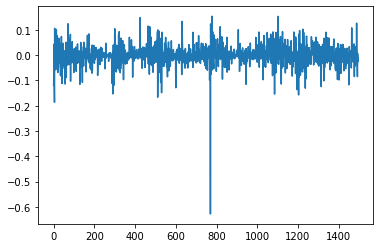

In [9]:
import matplotlib.pyplot as plt
plt.plot(train_df["[%]_Bitcoin_growth_rate_on_Horizon=1"])

In [11]:
import math

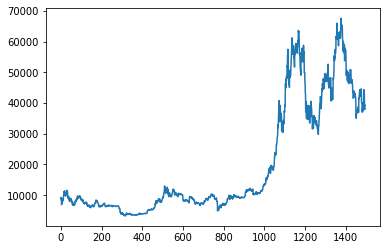

In [15]:
plt.plot(train_df["[+]_[T]_Bitcoin_Price"])

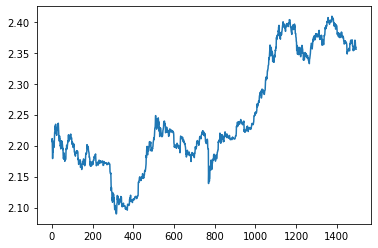

In [17]:
plt.plot(np.log(np.log(train_df["[+]_[T]_Bitcoin_Price"])))

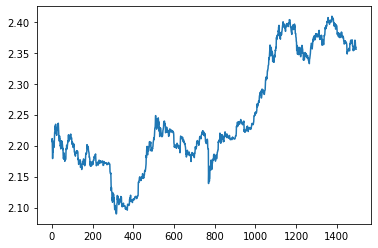

In [18]:
plt.plot(np.log(np.log(train_df["[+]_[T]_Bitcoin_Price"])))

In [23]:
model = RnnDlModel()
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")
Y_pred = model.run(X_test_list[0],X_train_list[0],Y_train_list[0])

In [22]:
Y_pred

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      